# Analysing cosine vs correlations data qualitatively and quantitatively

Using Eoin's cosine vs correlations dataset

## First load the codebook


In [1]:
import pandas as pd

In [2]:
codebook = pd.read_excel("data/raw_mcelroy_cosine_correlation/codebook.xlsx")

In [3]:
codebook

,Questionnaire,Item number,Content
0,IDQ,1,Felt down or depressed for most of the day?
1,IDQ,2,Experienced less interest or pleasure from nor...
2,IDQ,3,Have had difficulty concentrating?
3,IDQ,4,Had feelings of worthlessness or guilt?
4,IDQ,5,Felt hopeless?
5,IDQ,6,Had recurrent thoughts of death or suicide?
6,IDQ,7,Have had changes in appetite or sleep?
7,IDQ,8,Moved slower or felt more restless?
8,IDQ,9,Experienced reduced energy or fatigue?
9,IAQ,10,Felt nervous or anxious?


In [4]:
supp = pd.read_csv("data/raw_mcelroy_cosine_correlation/SuppFile2.csv", skiprows=1)

In [5]:
supp

,Unnamed: 0,from,to,spearman,cosine,sample
0,1,1,10,0.719539,0.611496,1
1,2,1,11,0.719244,0.445721,1
2,3,1,12,0.731183,0.711875,1
3,4,1,13,0.665979,0.571581,1
4,5,1,14,0.703581,0.511956,1
...,...,...,...,...,...,...
736,737,9,35,0.530528,0.194023,1
737,738,9,36,0.544454,0.284540,1
738,739,9,37,0.542928,0.190842,2
739,740,9,38,0.519665,0.355699,1


In [6]:
import matplotlib.pyplot as plt

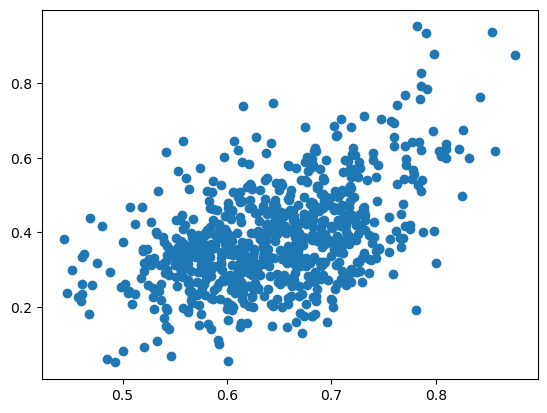

In [7]:
plt.scatter(supp.spearman, supp.cosine)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
m = LinearRegression()

In [10]:
m.fit(supp[["cosine"]], supp.spearman)

LinearRegression()

In [11]:
supp["pred_spearman"] = m.predict(supp[["cosine"]])

In [12]:
item_no_to_text = dict(codebook.set_index("Item number")["Content"])

In [13]:
supp["residual"] = supp.pred_spearman - supp.spearman

In [14]:
supp["from_text"] = supp["from"].map(item_no_to_text)
supp["to_text"] = supp["to"].map(item_no_to_text)

In [15]:
supp.sort_values("residual", inplace=True)

In [16]:
supp

,Unnamed: 0,from,to,spearman,cosine,sample,pred_spearman,residual,from_text,to_text
315,316,2,5,0.781048,0.192291,2,0.590467,-0.190580,Experienced less interest or pleasure from nor...,Felt hopeless?
242,243,18,19,0.799763,0.317833,1,0.625070,-0.174693,Little interest or pleasure in doing things?,"Feeling down, depressed, or hopeless?"
10,11,1,2,0.824578,0.496799,1,0.674397,-0.150181,Felt down or depressed for most of the day?,Experienced less interest or pleasure from nor...
67,68,11,12,0.797893,0.403386,1,0.648650,-0.149243,Worried a lot about different things?,Felt physically tense or agitated?
576,577,4,5,0.856531,0.617693,1,0.707718,-0.148813,Had feelings of worthlessness or guilt?,Felt hopeless?
...,...,...,...,...,...,...,...,...,...,...
355,356,21,38,0.460698,0.335028,2,0.629809,0.169111,Feeling tired or having little energy?,"Being “super-alert”, watchful, or on guard?"
625,626,6,20,0.462781,0.343233,1,0.632071,0.169290,Had recurrent thoughts of death or suicide?,"Trouble falling or staying asleep, or sleeping..."
324,325,20,25,0.480676,0.417306,1,0.652487,0.171811,"Trouble falling or staying asleep, or sleeping...",Moving or speaking so slowly that other people...
325,326,20,26,0.469208,0.437519,2,0.658058,0.188850,"Trouble falling or staying asleep, or sleeping...","Thoughts that you would be better off dead, or..."


In [17]:
import numpy
actual = supp.cosine
predict = supp.spearman

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
print (corr)
R_sq = corr**2

print(R_sq)

0.4988612783995188
0.24886257508640222


Question for Eoin: the cosine vs correlations paper has R2 = 0.23. I get 0.25. Any idea why?

In [18]:
print ("CORRELATIONS WHICH HARMONY DIDN'T PREDICT (FALSE NEGATIVES)\n")
for idx in range(10):
    print (supp.from_text.iloc[idx], "\n\t= ", supp.to_text.iloc[idx])

CORRELATIONS WHICH HARMONY DIDN'T PREDICT (FALSE NEGATIVES)

Experienced less interest or pleasure from normal activities for most of the day? 
	=  Felt hopeless?
Little interest or pleasure in doing things? 
	=  Feeling down, depressed, or hopeless?
Felt down or depressed for most of the day? 
	=  Experienced less interest or pleasure from normal activities for most of the day?
Worried a lot about different things? 
	=  Felt physically tense or agitated?
Had feelings of worthlessness or guilt? 
	=  Felt hopeless?
Have had difficulty concentrating? 
	=  Had feelings of worthlessness or guilt?
Experienced less interest or pleasure from normal activities for most of the day? 
	=  Have had difficulty concentrating?
Had difficulty concentrating? 
	=  Been easily annoyed by different things?
Felt nervous or anxious? 
	=  Worried a lot about different things?
Felt “on edge”? 
	=  Had difficulty concentrating?


In [19]:
print ("CORRELATIONS WHICH HARMONY INCORRECTLY PREDICTED (FALSE POSITIVES)\n")
for idx in range(len(supp) - 10, len(supp)):
    print (supp.from_text.iloc[idx], "\n\t= ", supp.to_text.iloc[idx])

CORRELATIONS WHICH HARMONY INCORRECTLY PREDICTED (FALSE POSITIVES)

Feeling tired or having little energy? 
	=  Having upsetting dreams that replay part of the experience or are clearly related to the experience? 
Feeling tired or having little energy? 
	=  Being so restless that it is hard to sit still?
Experienced sleep disturbances? 
	=  Having upsetting dreams that replay part of the experience or are clearly related to the experience? 
Trouble falling or staying asleep, or sleeping too much? 
	=  Being so restless that it is hard to sit still?
Trouble falling or staying asleep, or sleeping too much? 
	=  Having upsetting dreams that replay part of the experience or are clearly related to the experience? 
Feeling tired or having little energy? 
	=  Being “super-alert”, watchful, or on guard?
Had recurrent thoughts of death or suicide? 
	=  Trouble falling or staying asleep, or sleeping too much?
Trouble falling or staying asleep, or sleeping too much? 
	=  Moving or speaking so slo

In [20]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectoriser = CountVectorizer(lowercase=True)
transformer = TfidfTransformer()

nb = MultinomialNB()
model = make_pipeline(vectoriser, transformer, nb)

y = ["harmony false positive"] * len(supp)
for i in range(len(supp)//2):
    y[i] = "harmony missed"
    
for i in range(len(supp)//4, len(supp)//4 * 3):
    y[i] = "neither"

model.fit(supp.from_text + " " + supp.to_text, y)

fake_document = " ".join(vectoriser.vocabulary_)
vectorised_document = vectoriser.transform([fake_document])
transformed_document = transformer.transform(vectorised_document)
probas = np.zeros((transformed_document.shape[1]))

for prediction_idx in range(3):
    print(f"Strongest predictors for class {prediction_idx} {model.classes_[prediction_idx]}\n")
    for i in range(transformed_document.shape[1]):
        zeros = np.zeros(transformed_document.shape)
        zeros[0, i] = transformed_document[0, i]
        proba = nb.predict_log_proba(zeros)
        probas[i] = proba[0, prediction_idx]

    for ctr, j in enumerate(np.argsort(-probas)):
        for w, i in vectoriser.vocabulary_.items():
            if i == j:
                print(f"{ctr}\t{w}")
        if ctr > 15:
            break

Strongest predictors for class 0 harmony false positive

0	sleeping
1	asleep
2	falling
3	staying
4	upsetting
5	clearly
6	dreams
7	part
8	replay
9	related
10	alert
11	watchful
12	super
13	guard
14	moving
15	come
16	into
Strongest predictors for class 1 harmony missed

0	reading
1	newspaper
2	such
3	television
4	watching
5	normal
6	from
7	less
8	worthlessness
9	guilt
10	relaxing
11	concentrating
12	doing
13	worried
14	interest
15	pleasure
16	reduced
Strongest predictors for class 2 neither

0	poor
1	overeating
2	appetite
3	changes
4	hard
5	it
6	still
7	sit
8	tired
9	discomfort
10	heart
11	mouth
12	breathing
13	racing
14	dry
15	stomach
16	awful


In [21]:
y_pred = model.predict(supp.from_text + " " + supp.to_text)

# Sanity check: try generating cosine values with Harmony directly instead of using data from Eoin's paper

In [22]:
import harmony

In [23]:
from harmony.schemas.requests.text import Instrument, Question
questions = []
for idx in range(len(codebook)):
    questions.append(Question(question_text=codebook.Content.iloc[idx], question_no = "1"))
instrument = Instrument(questions=questions)

In [24]:
questions, similarity, query_similarity, new_vectors_dict = harmony.match_instruments([instrument])

In [25]:
similarities = []
for idx in range(len(supp)):
    q1 = supp["from"].iloc[idx]
    q2 = supp["to"].iloc[idx]
    harmony_cosine_similarity = similarity[q1-1,q2-1]
    similarities.append(abs(harmony_cosine_similarity))
supp["cosine_from_harmony"] = similarities

In [26]:
import numpy
actual = supp.cosine_from_harmony
predict = supp.spearman

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
print (corr)
R_sq = corr**2

print(R_sq)

0.49886123475927896
0.24886253154555243


# Try OpenAI Ada 2 as a matching function

In [27]:
import openai
import numpy as np
from harmony import match_instruments_with_function, example_instruments
model_name = "text-embedding-ada-002"
def convert_texts_to_vector(texts):
    vectors = openai.Embedding.create(input = texts, model=model_name)['data']
    return np.asarray([vectors[i]["embedding"] for i in range(len(vectors))])
all_questions, similarity, query_similarity, new_vectors_dict = match_instruments_with_function([instrument], None, convert_texts_to_vector)

In [28]:
similarities = []
for idx in range(len(supp)):
    q1 = supp["from"].iloc[idx]
    q2 = supp["to"].iloc[idx]
    openai_cosine_similarity = similarity[q1-1,q2-1]
    similarities.append(abs(openai_cosine_similarity))
supp["cosine_from_openai"] = similarities

In [29]:
import numpy
actual = supp.cosine_from_openai
predict = supp.spearman

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
print (corr)
R_sq = corr**2

print(R_sq)

0.6131353346716581
0.37593493862292626


# Try OpenAI Ada 3 as a matching function

In [30]:
import openai
import numpy as np
from harmony import match_instruments_with_function, example_instruments
model_name = "text-embedding-3-large"
def convert_texts_to_vector(texts):
    vectors = openai.Embedding.create(input = texts, model=model_name)['data']
    return np.asarray([vectors[i]["embedding"] for i in range(len(vectors))])
all_questions, similarity, query_similarity, new_vectors_dict = match_instruments_with_function([instrument], None, convert_texts_to_vector)

In [31]:
similarities = []
for idx in range(len(supp)):
    q1 = supp["from"].iloc[idx]
    q2 = supp["to"].iloc[idx]
    openai_cosine_similarity = similarity[q1-1,q2-1]
    similarities.append(abs(openai_cosine_similarity))
supp["cosine_from_openai_ada_3"] = similarities

In [32]:
import numpy
actual = supp.cosine_from_openai_ada_3
predict = supp.spearman

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
print (corr)
R_sq = corr**2

print(R_sq)

0.586151725895444
0.34357384577020766


# Try Mpnet (English only model)

In [33]:
import os
from typing import List

import numpy as np
from numpy import ndarray
from sentence_transformers import SentenceTransformer

from harmony import match_instruments_with_function
from harmony.schemas.requests.text import Instrument

model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")


def convert_texts_to_vector(texts: List) -> ndarray:
    embeddings = model.encode(sentences=texts, convert_to_numpy=True)

    return embeddings



In [34]:
all_questions, similarity, query_similarity, new_vectors_dict = match_instruments_with_function([instrument], None, convert_texts_to_vector)


similarities = []
for idx in range(len(supp)):
    q1 = supp["from"].iloc[idx]
    q2 = supp["to"].iloc[idx]
    mpnet_cosine_similarity = similarity[q1-1,q2-1]
    similarities.append(abs(mpnet_cosine_similarity))
supp["cosine_from_mpnet"] = similarities


import numpy
actual = supp.cosine_from_mpnet
predict = supp.spearman

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
print (corr)
R_sq = corr**2

print(R_sq)

0.5695916018755588
0.3244345929271651
